In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv(r'creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.shape

(3973, 31)

In [ ]:
# check null values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [5]:
df.duplicated().sum()

32

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(3941, 31)

In [10]:
columns = df.columns
columns# Exploratory Data Analysis (EDA) ### Return some information about our column

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3941 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3941 non-null   int64  
 1   V1      3941 non-null   float64
 2   V2      3941 non-null   float64
 3   V3      3941 non-null   float64
 4   V4      3941 non-null   float64
 5   V5      3941 non-null   float64
 6   V6      3941 non-null   float64
 7   V7      3941 non-null   float64
 8   V8      3941 non-null   float64
 9   V9      3941 non-null   float64
 10  V10     3941 non-null   float64
 11  V11     3941 non-null   float64
 12  V12     3941 non-null   float64
 13  V13     3941 non-null   float64
 14  V14     3941 non-null   float64
 15  V15     3941 non-null   float64
 16  V16     3941 non-null   float64
 17  V17     3941 non-null   float64
 18  V18     3941 non-null   float64
 19  V19     3941 non-null   float64
 20  V20     3941 non-null   float64
 21  V21     3941 non-null   float64
 22  V22  

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,...,3941.000000,3941.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000
mean,1638.799543,-0.327018,0.304421,0.836564,0.007498,-0.028404,0.048063,0.148966,-0.075866,0.052984,...,0.011385,-0.081438,-0.058418,0.032846,0.095189,-0.012249,0.046310,0.003101,65.338447,0.000508
std,1016.659228,1.350192,1.182071,0.982942,1.421170,1.210735,1.288958,1.092301,1.296063,0.920682,...,0.858485,0.636062,0.392458,0.602652,0.407115,0.504627,0.350012,0.253671,214.494564,0.022527
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,750.000000,-1.016034,-0.159358,0.286665,-0.913697,-0.571939,-0.739014,-0.275514,-0.205992,-0.478856,...,-0.210402,-0.511349,-0.210860,-0.332077,-0.143579,-0.340133,-0.040925,-0.020983,2.237500,0.000000
50%,1525.000000,-0.446501,0.408263,0.889959,0.093193,-0.088854,-0.214589,0.164951,0.028133,0.027599,...,-0.053073,-0.064279,-0.069939,0.103739,0.107953,-0.024702,0.033751,0.021234,12.990000,0.000000
75%,2526.000000,1.073759,0.919193,1.433851,0.966378,0.392814,0.438476,0.634126,0.296697,0.618649,...,0.103346,0.347476,0.063133,0.434121,0.363605,0.286833,0.205265,0.087138,55.337500,0.000000
max,3624.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


In [13]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.032123,0.038248,-0.015516,-0.133490,0.049832,-0.019349,0.034665,0.006433,0.059877,...,0.008862,0.113138,-0.062898,0.029668,-0.030171,-0.141752,0.042471,0.030628,-0.022435,-0.026597
V1,-0.032123,1.000000,-0.173102,-0.156023,0.144744,-0.098139,-0.050005,-0.116008,0.223647,-0.135891,...,-0.109085,-0.040892,-0.119176,-0.017446,0.330775,-0.008223,-0.116432,0.071845,-0.195327,-0.039240
V2,0.038248,-0.173102,1.000000,0.037713,-0.034473,0.129179,-0.065843,0.079348,-0.188886,0.066498,...,0.057106,-0.047177,0.092451,-0.009480,-0.147106,-0.097252,0.105948,-0.007381,-0.523649,-0.017290
V3,-0.015516,-0.156023,0.037713,1.000000,0.142695,-0.014167,-0.191195,-0.062042,0.085846,0.005902,...,0.016183,0.252420,0.002897,0.019140,-0.297076,0.067228,-0.170766,-0.170291,-0.277509,-0.025155
V4,-0.133490,0.144744,-0.034473,0.142695,1.000000,-0.154194,0.071616,-0.054467,0.069915,-0.251144,...,-0.058812,-0.041225,0.067479,-0.033565,-0.004421,0.154854,-0.094514,0.038295,0.120492,0.049728
V5,0.049832,-0.098139,0.129179,-0.014167,-0.154194,1.000000,0.057245,-0.203520,0.119305,0.027287,...,0.049581,-0.072658,-0.067702,-0.009766,-0.030305,-0.185893,-0.063728,-0.209978,-0.531992,0.008325
V6,-0.019349,-0.050005,-0.065843,-0.191195,0.071616,0.057245,1.000000,0.003185,-0.006572,-0.016109,...,0.021563,-0.016999,0.001682,0.000189,0.075700,0.070193,0.033446,0.045486,0.300928,-0.022620
V7,0.034665,-0.116008,0.079348,-0.062042,-0.054467,-0.203520,0.003185,1.000000,0.174600,0.032906,...,-0.085485,0.058607,-0.092529,0.001208,-0.104616,-0.120792,0.014277,-0.007048,0.471593,-0.025888
V8,0.006433,0.223647,-0.188886,0.085846,0.069915,0.119305,-0.006572,0.174600,1.000000,-0.063356,...,-0.201072,0.050302,-0.146594,-0.036260,0.034226,0.064508,0.035307,0.074437,-0.086415,0.012828
V9,0.059877,-0.135891,0.066498,0.005902,-0.251144,0.027287,-0.016109,0.032906,-0.063356,1.000000,...,0.072562,0.089587,-0.105834,0.020983,0.139863,-0.054498,0.032983,-0.170139,-0.057281,-0.038518


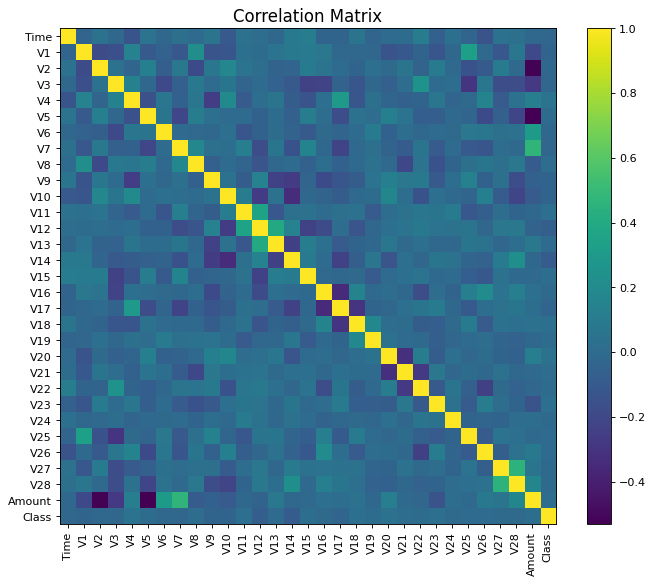

In [14]:
### Visual representation of the correlation between different features in the dataset
corr = df.corr()
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix', fontsize=15)
plt.show()

<Figure size 2000x2000 with 0 Axes>

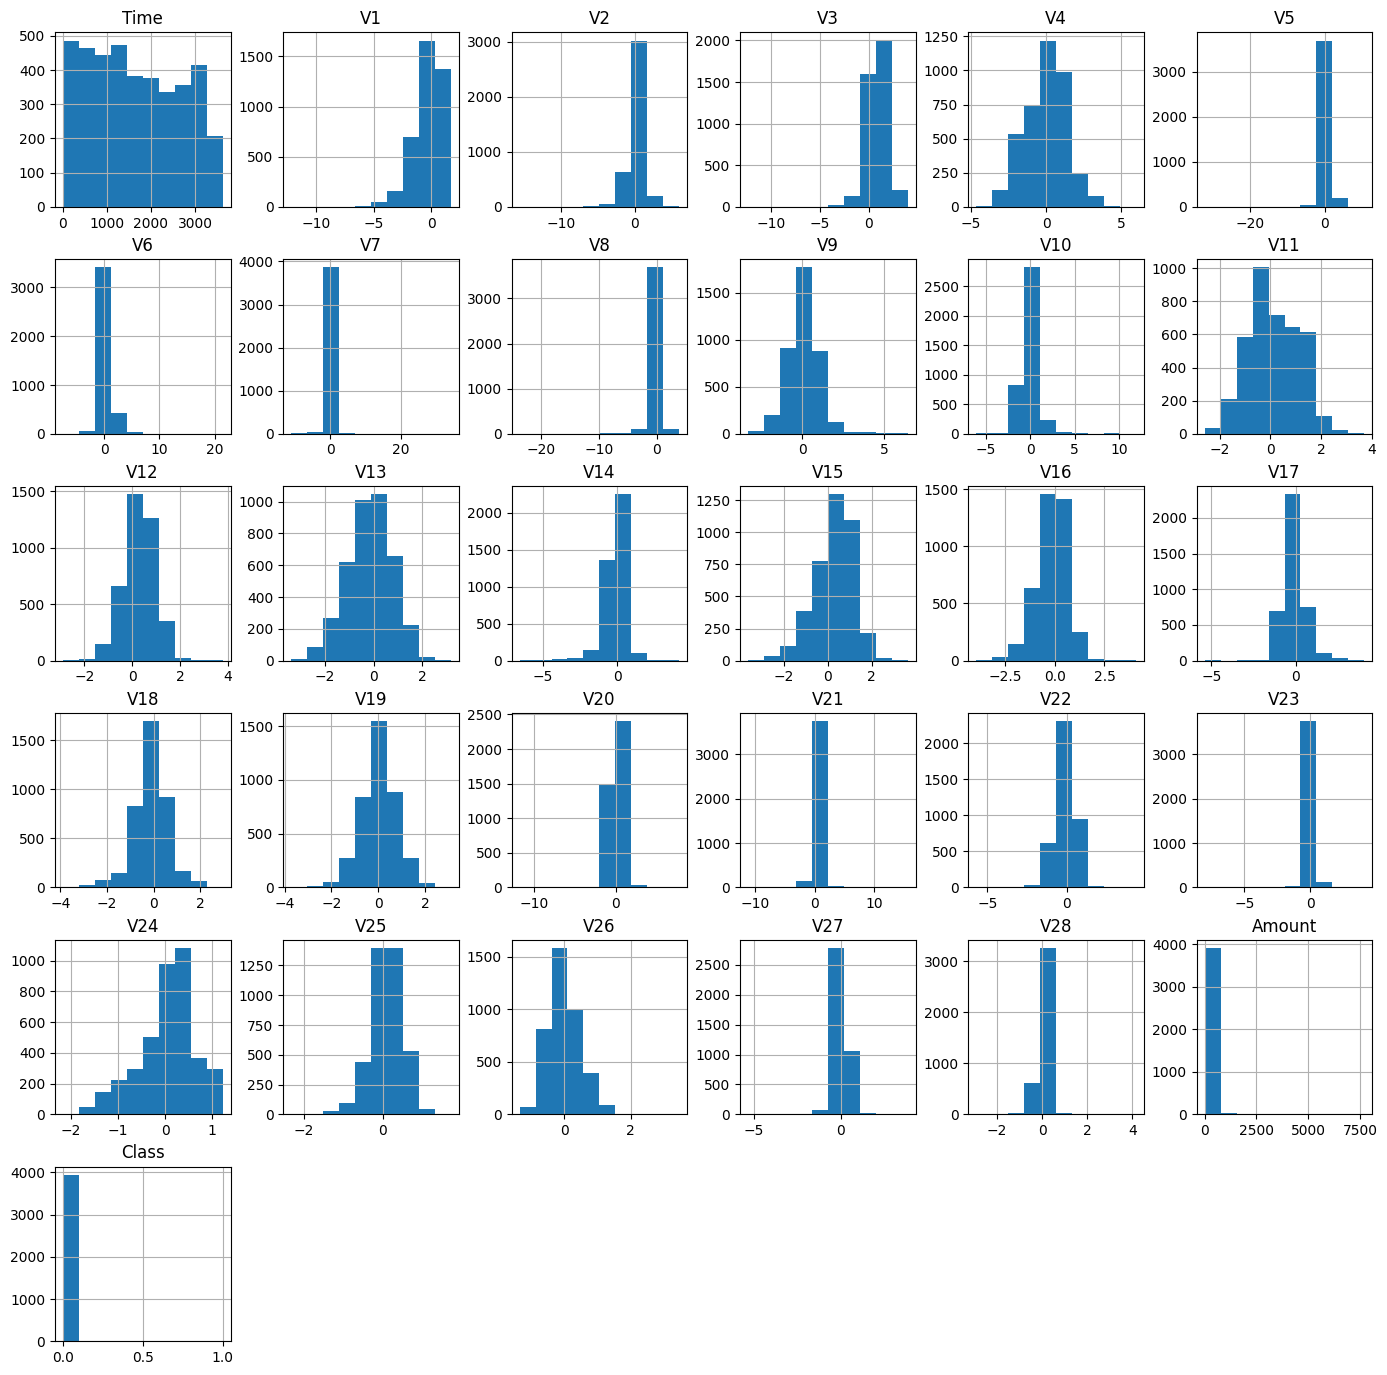

In [15]:
plt.figure(figsize=(20, 20))
df.hist(figsize=(17, 17))
plt.show()

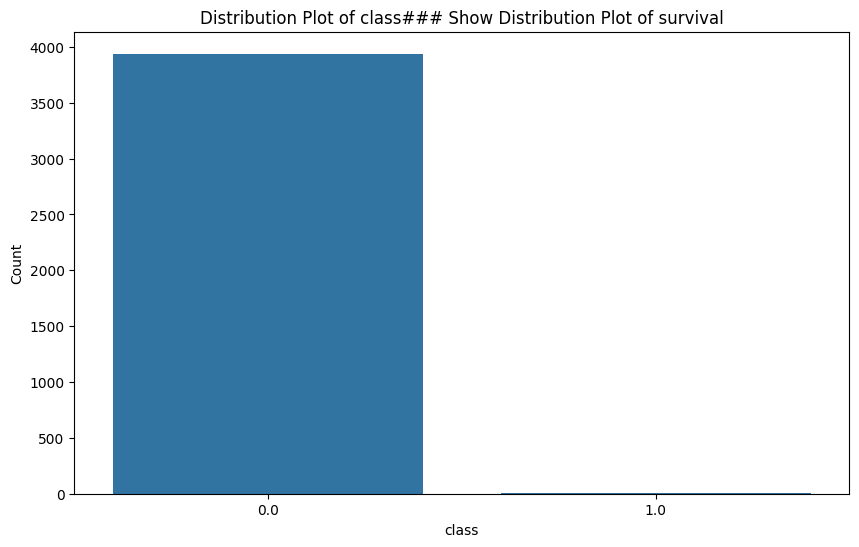

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution Plot of class### Show Distribution Plot of survival')### Show Distribution Plot of Letters
plt.xlabel('class')
plt.ylabel('Count')
plt.show()

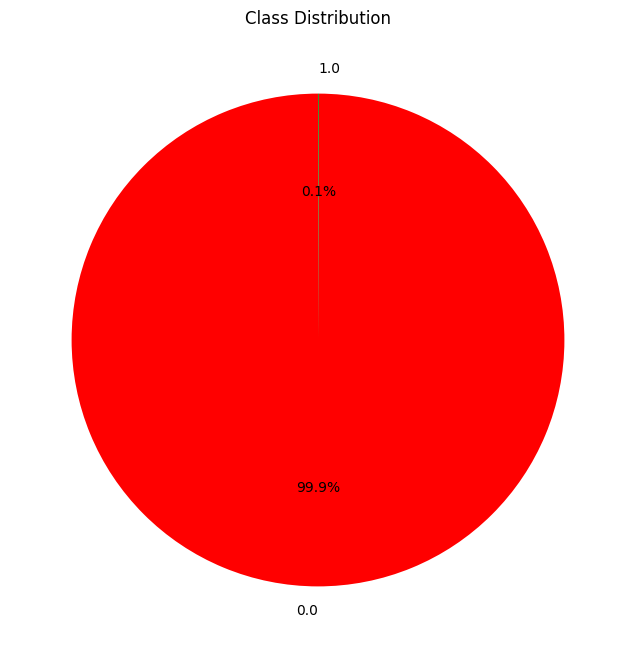

In [17]:
# Count the occurrences of each unique value in the 'Survived' column
class_counts = df['Class'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Class Distribution')
plt.show()

In [18]:
class_counts

,count
Class,
0.0,3938
1.0,2


In [19]:
x = df.drop(columns=['Class'],axis=1)
y = df['Class']

In [20]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x.shape

(3941, 30)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('trainig size',x_train.shape,y_train.shape)
print('test size',x_test.shape,y_test.shape)### Split our data to training and test sets

trainig size (3152, 30) (3152,)
test size (789, 30) (789,)


In [30]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=12)

# Resample the data
x_train_resample, y_train_resample = ros.fit_resample(x_train, y_train)

In [31]:
y_train_resample.value_counts()


,count
Class,
0.0,3151
1.0,3151


In [32]:
LR = LogisticRegression(solver='liblinear').fit(x_train_resample,y_train_resample)
LR

LogisticRegression(solver='liblinear')

In [33]:
yhat_log = LR.predict(x_test)
yhat_log

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [34]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[9.99528357e-01, 4.71642511e-04],
       [9.98872333e-01, 1.12766745e-03],
       [9.97625264e-01, 2.37473632e-03],
       ...,
       [9.96870981e-01, 3.12901855e-03],
       [9.99599309e-01, 4.00691045e-04],
       [9.99809569e-01, 1.90431373e-04]])

In [35]:
accuracy_logistic = metrics.accuracy_score(y_test ,yhat_log )
print('Accuracy : ',accuracy_logistic )

Accuracy :  0.9949238578680203


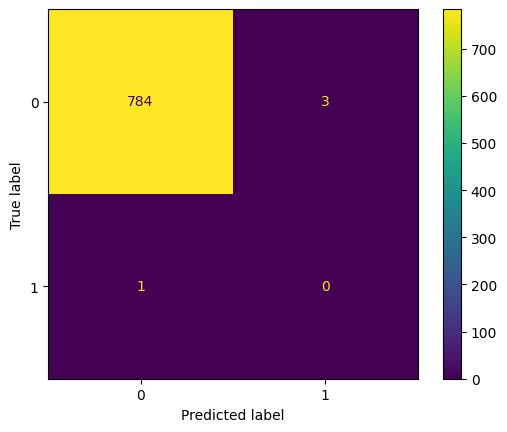

In [36]:
matrix = confusion_matrix(y_test, yhat_log)
dis = ConfusionMatrixDisplay(matrix)
dis.plot()
plt.show()

In [37]:
report_4 = classification_report(y_test ,yhat_log)
# Print the classification report
print(report_4)
f1_logistic = metrics.f1_score(y_test, yhat_log, average='weighted')
jaccard_logistic= jaccard_score(y_test, yhat_log,pos_label=0)
print("F1_score : ",f1_logistic)
print('jaccard_score',jaccard_logistic)
print('log_loss',log_loss(y_test, yhat_prob))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       787
         1.0       0.00      0.00      0.00         1

    accuracy                           0.99       788
   macro avg       0.50      0.50      0.50       788
weighted avg       1.00      0.99      1.00       788

F1_score :  0.9961896643029668
jaccard_score 0.9949238578680203
log_loss 0.017124466663770953
